Predict whether the cancer is benign or malignant

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
path='/content/drive/MyDrive/Breast Cancer Wisconsin_data.csv'
data_raw=pd.read_csv(path)
data_raw

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Attribute Information:

1) ID number   
2) Diagnosis (M = malignant, B = benign)   
3-32)   

Ten real-valued features are computed for each cell nucleus:   

a) radius (mean of distances from center to points on the perimeter)   
b) texture (standard deviation of gray-scale values)   
c) perimeter   
d) area   
e) smoothness (local variation in radius lengths)   
f) compactness (perimeter^2 / area - 1.0)   
g) concavity (severity of concave portions of the contour)   
h) concave points (number of concave portions of the contour)   
i) symmetry   
j) fractal dimension ("coastline approximation" - 1)   

In [ ]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Check missing values

In [ ]:
data_raw.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Check duplicate data

In [ ]:
print(f'Checking the duplicate values in given dataset:{data_raw.duplicated().sum()}')

Checking the duplicate values in given dataset:0


### Removing the Unnamed column

In [ ]:
data=data_raw.drop(columns=['id','Unnamed: 32'])

## Only diagnosis is category type

In [ ]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data=data.copy()

# Data Exploration

In [ ]:
def plot_data(data):
  num_col=len(data.columns)
  for i in data.columns:
    plt.figure(figsize=(5,3))
    plt.hist(data[i],edgecolor='black', color='g')
    plt.title(i, fontweight='bold')
    plt.show()

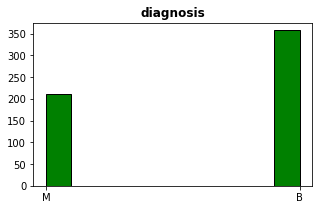

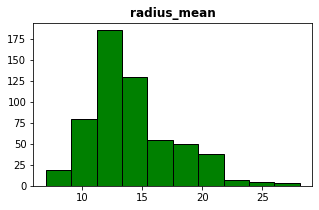

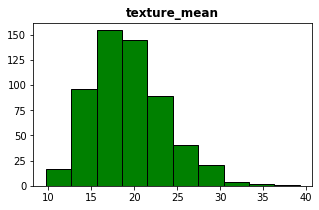

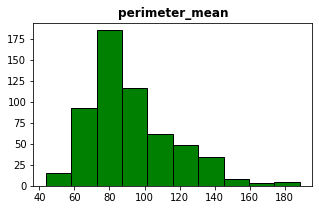

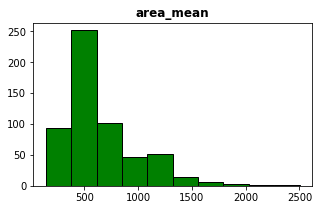

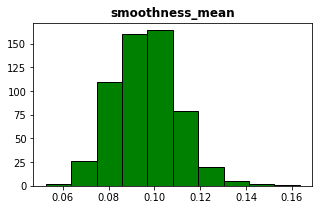

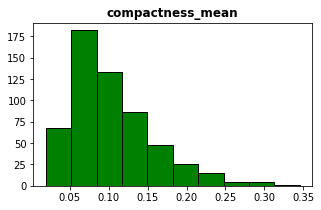

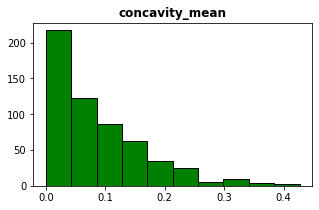

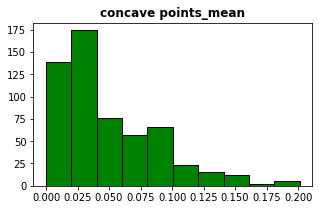

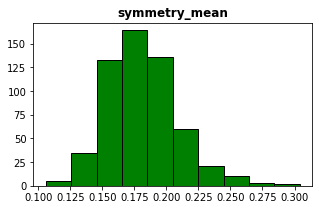

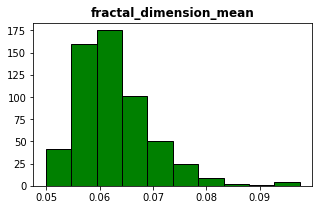

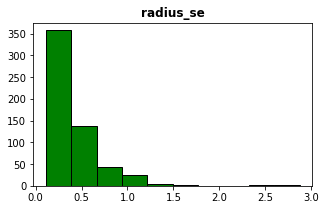

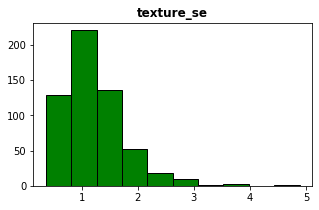

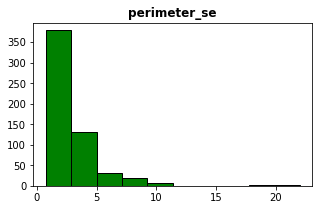

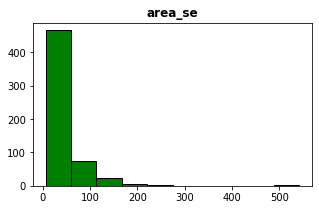

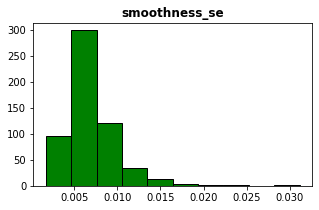

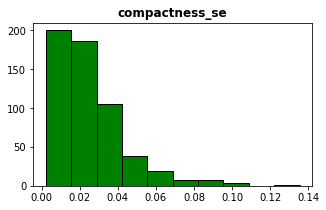

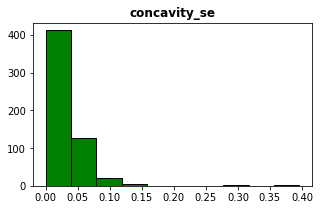

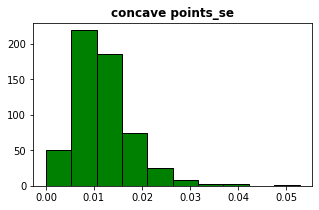

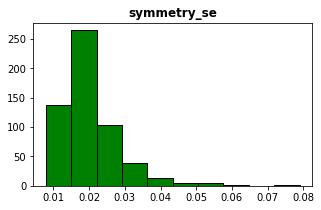

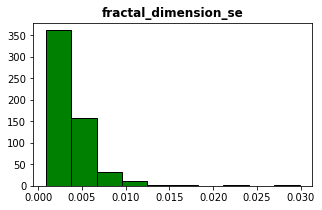

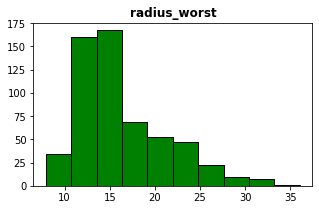

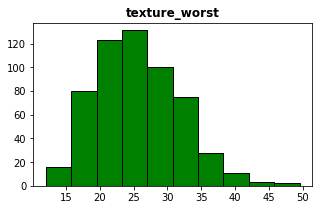

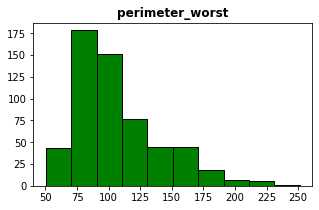

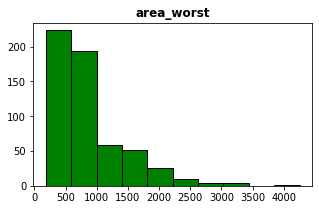

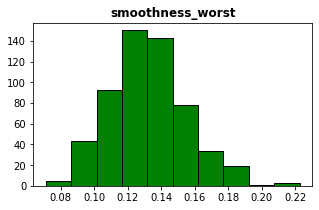

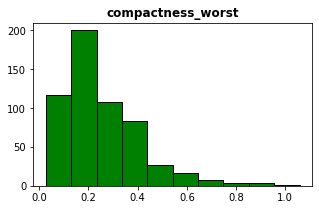

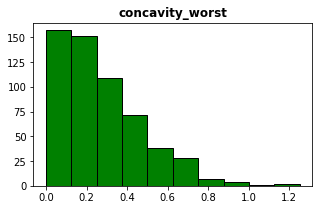

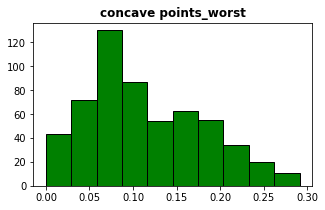

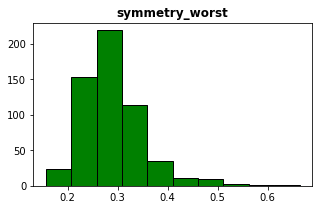

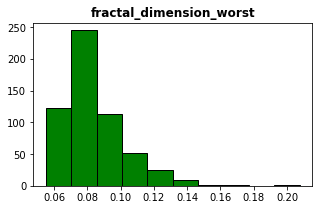

In [ ]:
plot_data(data)

In [ ]:
def print_range(data,data2,data3, feature_list):
  for i in feature_list:
    print(i+':')
    print('The range of the '+i+' is from {} to {}'.format(min(data[i]), max(data[i])))
    print('The range the benign of the '+i+' is from {} to {}'.format(min(b_data[i]), max(b_data[i])))
    print('The range the malignant of the '+i+' is from {} to {}'.format(min(m_data[i]), max(m_data[i])))
    print('  ')

# Remove outlier

In [ ]:
def get_outlier(df_in, col_name,weight):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-weight*iqr
    fence_high = q3+weight*iqr
    return fence_low,fence_high

In [ ]:
def get_ourliter_by_weight(df_in,col_name,weight1,weight2):
  fence_low,fence_high=get_outlier(df_in, col_name,weight1)
  greater=df_in[df_in[col_name]>fence_high]
  gap=len(greater)/len(df_in[col_name])
  if gap<1/30:
    pass
  else: 
    fence_low,fence_high=get_outlier(df_in, col_name,weight2)
  removelist=df_in[df_in[col_name]>fence_high].index
  return list(removelist)

In [ ]:
def remove_outlier(data,features,weight1,weight2):
  remove_list=[]
  for i in features:    
    remove_list+=get_ourliter_by_weight(data,i,weight1,weight2)
  return list(set(remove_list))

In [ ]:
features=list(data.columns)
features.remove('diagnosis')
remove_list=remove_outlier(data,features,0.5,0.5)
print(len(list(set(remove_list))))

354


In [ ]:
df=data.drop(remove_list)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.033230,0.1528,...,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
16,M,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.052590,0.1586,...,19.070,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,B,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.023690,0.1620,...,15.050,24.75,99.17,688.6,0.12640,0.20370,0.13770,0.06845,0.2249,0.08492
545,B,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.024430,0.1664,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
546,B,10.320,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,...,11.250,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399
548,B,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,...,10.930,25.59,69.10,364.2,0.11990,0.09546,0.09350,0.03846,0.2552,0.07920


In [ ]:
print_range(data,b_data,m_data, list(data.columns))

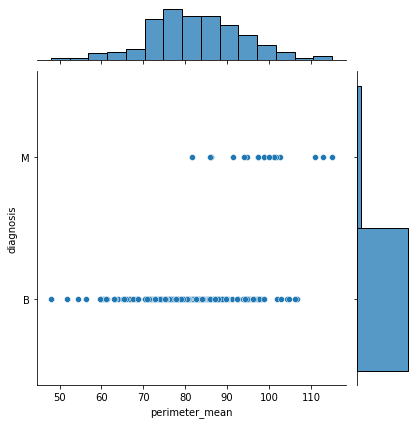

In [ ]:
sns.jointplot(x='perimeter_mean', y='diagnosis', data=df)

# Data splitting

In [ ]:
x=df.drop(columns='diagnosis',axis=1)
y=df['diagnosis']
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(x) # creating an instance of the class object

### Before removing outliers

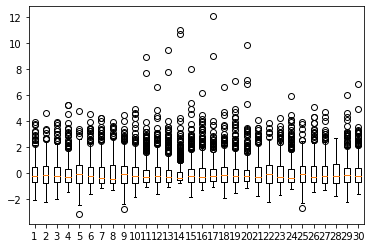

In [ ]:
box_plot_data=data.drop('diagnosis', axis=1)
box_plot_std_data= StandardScaler().fit_transform(box_plot_data)
plt.boxplot(box_plot_std_data)
plt.show()

### After removing outliers

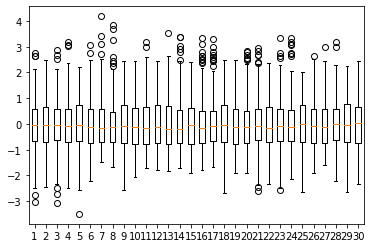

In [ ]:
box_plot_data=X_scaled
plt.boxplot(box_plot_data)
plt.show()

## Splitting the training set and testing set

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.15,random_state=42)
print('The shape of x is: ',x.shape)
print('The shape of x_train is: ',x_train.shape)
print('The shape of x_test is: ',x_test.shape)

The shape of x is:  (215, 30)
The shape of x_train is:  (182, 30)
The shape of x_test is:  (33, 30)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)      
clf_rf.fit(x_train,y_train)
preds = clf_rf.predict(x_test)
ac = accuracy_score(y_test,preds)
print('Accuracy is: ',ac)

Accuracy is:  1.0


In [ ]:
print(preds)

['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B']
